# Morphological Operators with Binary Image

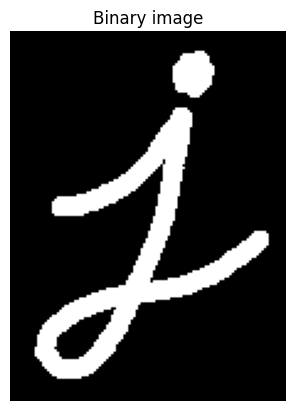

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image as grayscale
img_gray = cv2.imread('input.png', 0)

# Convert to binary image by using auto-calculate threshold
(thresh, img) = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Using plt.imshow to display the binary image
plt.imshow(img, cmap='gray')
plt.title('Binary image')
plt.axis('off')  # Turn off axis
plt.show()

## Binary Dilation

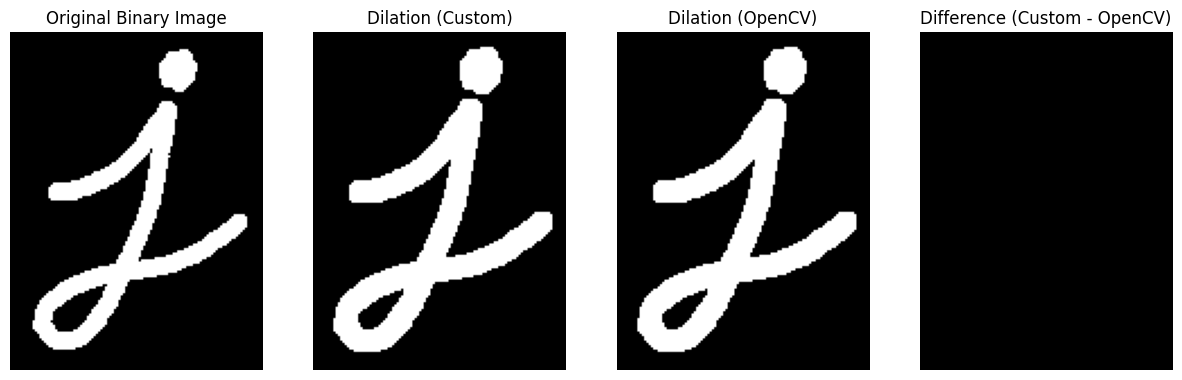

In [2]:
def dilation(img, kernel):
    new_img = np.zeros(img.shape, dtype=np.uint8)

    # Define kernel offset
    offset_x = len(kernel[0]) // 2
    offset_y = len(kernel) // 2

    # Iterate over interior pixels of the image
    for y in range(offset_y, len(img) - offset_y):
        for x in range(offset_x, len(img[0]) - offset_x):
            # Check if the offset of the kernel is within the object boundaries
            if(img[y][x] == 255):
                for i in range(len(kernel)):
                    for j in range(len(kernel[0])):
                        # Perform dilation by setting corresponding pixels in the new_img to 255
                        new_y = y + offset_y - i
                        new_x = x + offset_x - j
                        if kernel[i][j] == 1: 
                            new_img[new_y][new_x] = 255

    return new_img

# Define the dilation kernel
dilation_kernel = np.ones((3, 3), dtype=np.uint8)

# Perform dilation using custom implementation
dilation_img_custom = dilation(img, dilation_kernel)

# Perform dilation using OpenCV
dilation_img_opencv = cv2.dilate(img, dilation_kernel, iterations=1)

# Compute the difference between the custom dilation image and the OpenCV dilation image
dilation_difference = dilation_img_custom - dilation_img_opencv

# Plot original, custom dilation, OpenCV dilation, and difference images side by side
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Binary Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(dilation_img_custom, cmap='gray')
plt.title('Dilation (Custom)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(dilation_img_opencv, cmap='gray')
plt.title('Dilation (OpenCV)')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(dilation_difference, cmap='gray')
plt.title('Difference (Custom - OpenCV)')
plt.axis('off')

plt.show()

## Binary Erosion

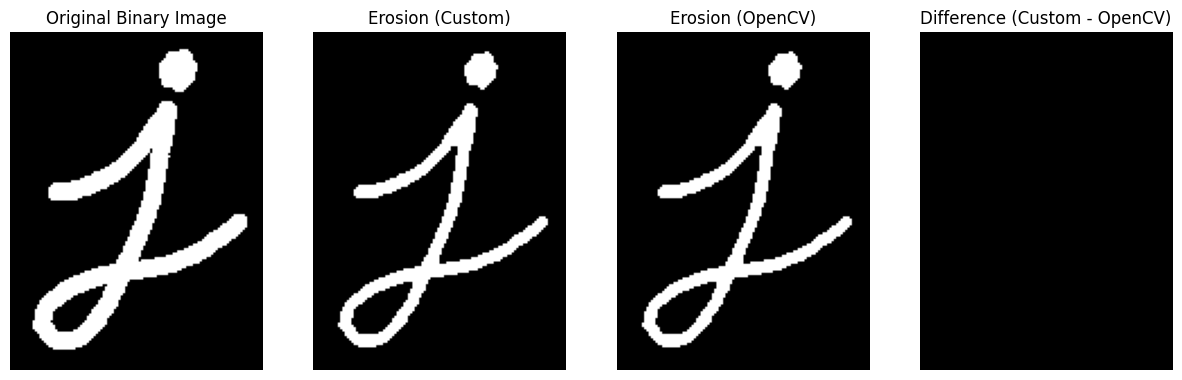

In [3]:
def erosion(img, kernel):
    new_img = np.zeros(img.shape, dtype=np.uint8)

    # Define kernel offset
    offset_x = len(kernel[0]) // 2
    offset_y = len(kernel) // 2

    # Iterate over interior pixels of the image
    for y in range(offset_y, len(img) - offset_y):
        for x in range(offset_x, len(img[0]) - offset_x):
            # Check if the center pixel is white (255)
            if img[y][x] == 255:
                # Check if all the neighboring pixels covered by the kernel are white
                erosion_flag = True
                for i in range(len(kernel)):
                    for j in range(len(kernel[0])):
                        if kernel[i][j] == 1 and img[y+offset_y-i][x+offset_x-j] != 255:
                            erosion_flag = False
                            break
                    if not erosion_flag:
                        break
                # If any neighboring pixel is not white, set the center pixel to black (0) in the new_img
                if erosion_flag:
                    new_img[y][x] = 255
    return new_img

# Define the erosion kernel
erosion_kernel = np.ones((3, 3), dtype=np.uint8)

# Perform erosion using custom implementation
erosion_img_custom = erosion(img, erosion_kernel)

# Perform erosion using OpenCV
erosion_img_opencv = cv2.erode(img, erosion_kernel, iterations=1)

# Compute the difference between the custom erosion image and the OpenCV erosion image
erosion_difference = erosion_img_custom - erosion_img_opencv

# Plot original, custom erosion, OpenCV erosion, and difference images side by side
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Binary Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(erosion_img_custom, cmap='gray')
plt.title('Erosion (Custom)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(erosion_img_opencv, cmap='gray')
plt.title('Erosion (OpenCV)')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(erosion_difference, cmap='gray')
plt.title('Difference (Custom - OpenCV)')
plt.axis('off')

plt.show()

## Binary Opening

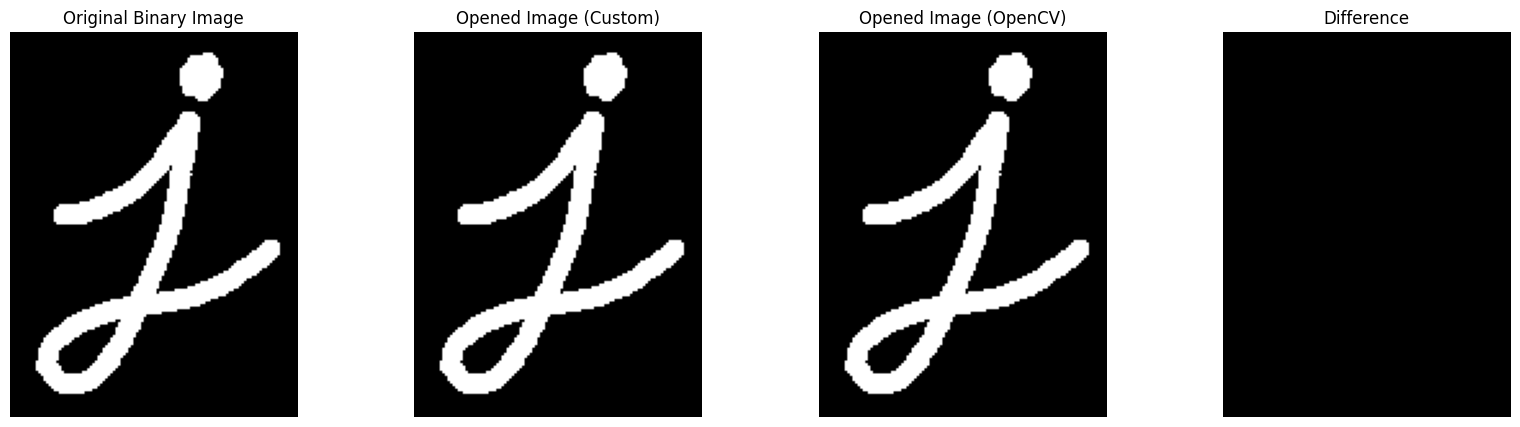

In [4]:
# Define the binary opening kernel
opening_kernel = np.array([[0, 1, 0],
                           [1, 1, 1],
                           [0, 1, 0]], dtype=np.uint8)

def open(img, kernel):
    # Call the erosion function to perform erosion
    eroded_img = erosion(img, kernel)
    opened_img = dilation(eroded_img, kernel)

    return opened_img


# Perform binary opening using custom implementation
opened_img_custom = open(img, opening_kernel)

# Perform binary opening using OpenCV
opened_img_opencv = cv2.morphologyEx(img, cv2.MORPH_OPEN, opening_kernel)

# Compute the absolute difference between the custom and OpenCV opened images
diff_img = np.abs(opened_img_custom.astype(int) - opened_img_opencv.astype(int)).astype(np.uint8)

# Plot original, custom opened, and OpenCV opened images side by side
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Binary Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(opened_img_custom, cmap='gray')
plt.title('Opened Image (Custom)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(opened_img_opencv, cmap='gray')
plt.title('Opened Image (OpenCV)')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(diff_img, cmap='gray')
plt.title('Difference')
plt.axis('off')

plt.show()

## Binary Closing

(-0.5, 111.5, 149.5, -0.5)

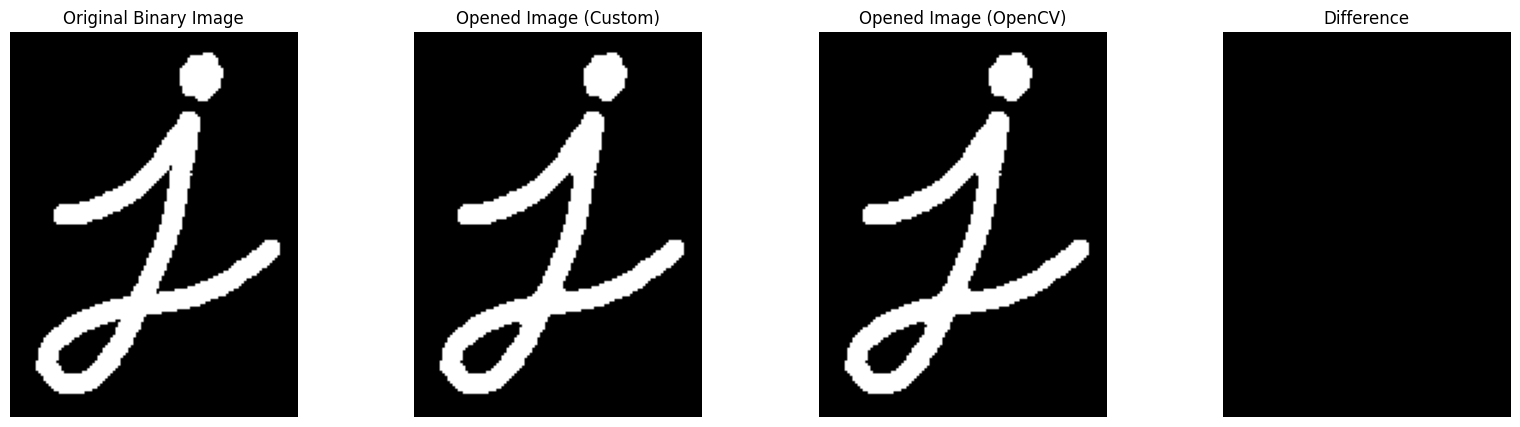

In [5]:
# Define the binary opening kernel
closing_kernel = np.array([[0, 1, 0],
                           [1, 1, 1],
                           [0, 1, 0]], dtype=np.uint8)

def close(img, kernel):
    # Call the erosion function to perform erosion
    closed_img = dilation(img, kernel)
    closed_img = erosion(closed_img, kernel)

    return closed_img

# Perfom binary closing using custom function
closed_img_custom = close(img, closing_kernel)
# Perform binary closing using OpenCV's morphologyEx function
closed_img_opencv = cv2.morphologyEx(img, cv2.MORPH_CLOSE, closing_kernel)

# Compute the absolute difference between the custom and OpenCV opened images
diff_img = np.abs(closed_img_custom.astype(int) - closed_img_opencv.astype(int)).astype(np.uint8)

# Plot original, custom opened, and OpenCV opened images side by side
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Binary Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(closed_img_custom, cmap='gray')
plt.title('Opened Image (Custom)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(closed_img_opencv, cmap='gray')
plt.title('Opened Image (OpenCV)')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(diff_img, cmap='gray')
plt.title('Difference')
plt.axis('off')

# Hit-or-miss

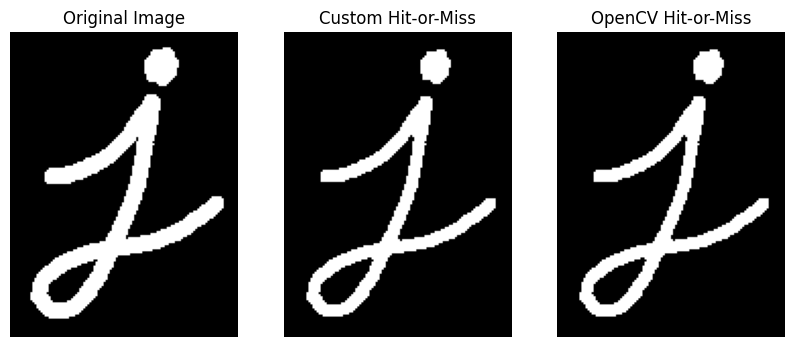

In [6]:
def get_local_background(kernel):
    # Get the complement of the kernel
    background = 1 - kernel

    # Insert 1 around the background kernel
    background_with_border = np.pad(background, pad_width=1, mode='constant', constant_values=1)
    return background_with_border

def hit_or_miss(img, kernel):
    background = get_local_background(kernel)

    hit = erosion(img, kernel)
    miss = erosion(1 - img, background)

    return cv2.bitwise_or(hit, miss)

hom_kernel = np.array([[0, 1, 0],
                        [1, 1, 1],
                        [0, 1, 0]], dtype=np.uint8)

# Apply your custom hit-or-miss transform
hom_custom = hit_or_miss(img, hom_kernel)

# Apply OpenCV's hit-or-miss transform
hom_opencv = cv2.morphologyEx(img, cv2.MORPH_HITMISS, hom_kernel)

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(hom_custom, cmap='gray')
plt.title('Custom Hit-or-Miss')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(hom_opencv, cmap='gray')
plt.title('OpenCV Hit-or-Miss')
plt.axis('off')

plt.show()

# Boundary Extraction

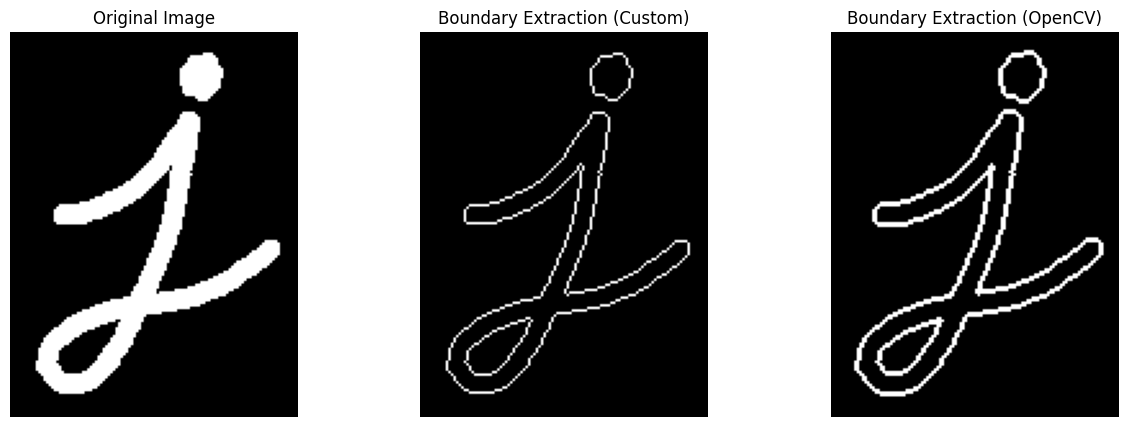

In [7]:
def boundary_extraction(img, kernel):
    # Perform erosion on the input image
    eroded_img = cv2.erode(img, kernel)

    # Compute the boundary by subtracting the eroded image from the original image
    boundary = img - eroded_img

    return boundary

boundary_kernel = np.array([[0, 1, 0],
                        [1, 1, 1],
                        [0, 1, 0]], dtype=np.uint8)

# Perform boundary extraction using your custom function
boundary_custom = boundary_extraction(img, boundary_kernel)

# Perform boundary extraction using OpenCV's morphologyEx function with MORPH_GRADIENT
boundary_opencv = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, boundary_kernel)

# Display the original image and the extracted boundary
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(boundary_custom, cmap='gray')
plt.title('Boundary Extraction (Custom)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(boundary_opencv, cmap='gray')
plt.title('Boundary Extraction (OpenCV)')
plt.axis('off')

plt.show()

# Binary Thinning

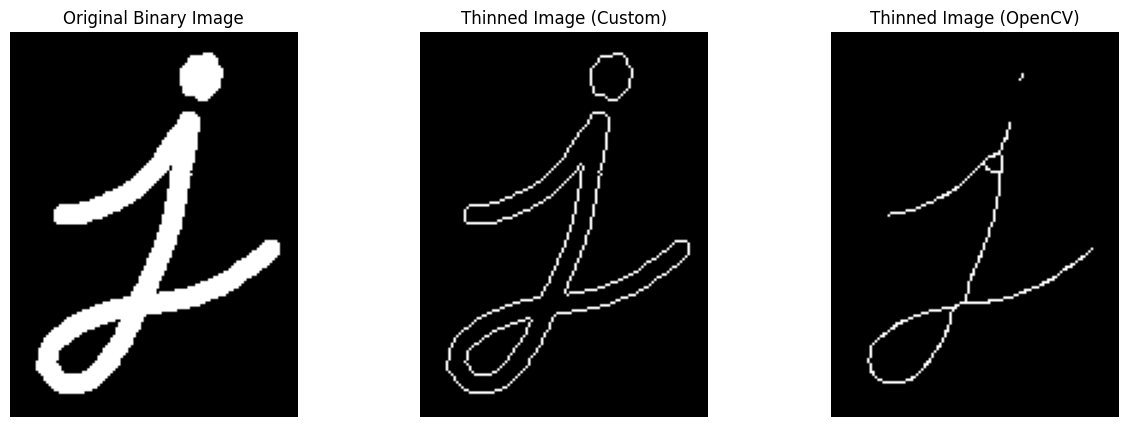

In [12]:

def thinning(img, kernel):
    return img - hit_or_miss(img, kernel)

# Define the binary thinning kernel
thinning_kernel = np.array([[0, 1, 0],
                            [1, 1, 1],
                            [0, 1, 0]], dtype=np.uint8)

# Perform binary thinning using the custom function
thinned_img_custom = thinning(img, thinning_kernel)

# Perform binary thinning using OpenCV's function
thinned_img_opencv = cv2.ximgproc.thinning(img)

# Plot original and custom thinned images side by side
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Binary Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(thinned_img_custom, cmap='gray')
plt.title('Thinned Image (Custom)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(thinned_img_opencv, cmap='gray')
plt.title('Thinned Image (OpenCV)')
plt.axis('off')

plt.show()


# Morphological Operators with Binary Image

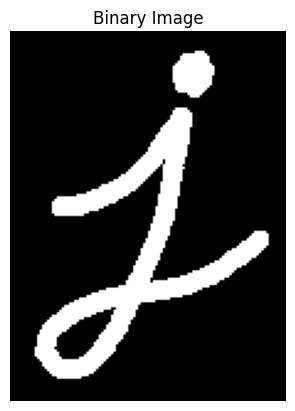

In [13]:
# Read image as grayscale
img = cv2.imread('input.png', cv2.IMREAD_GRAYSCALE)

# Convert to binary image by using auto-calculate threshold
(thresh, img_binary) = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# Display the binary image
plt.imshow(img_binary, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.show()


# Grayscale Dilation

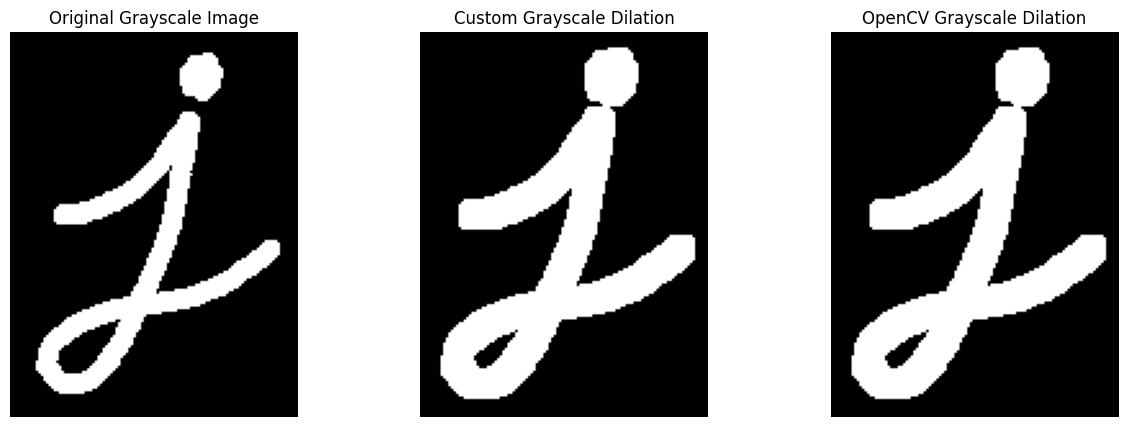

In [14]:
def grayscale_dilation(img, kernel):
    # Get the dimensions of the image and kernel
    img_height, img_width = img.shape[:2]
    kernel_height, kernel_width = kernel.shape[:2]
    
    # Calculate the padding required for the image
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # Create an empty output image
    dilated_img = np.zeros_like(img)
    
    # Pad the image on all sides
    padded_img = np.pad(img, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    
    # Iterate over each pixel in the image
    for i in range(img_height):
        for j in range(img_width):
            # Extract the neighborhood around the current pixel
            neighborhood = padded_img[i:i+kernel_height, j:j+kernel_width]
            # Apply dilation operation by taking the maximum value in the neighborhood
            dilated_img[i, j] = np.max(neighborhood * kernel)
    
    return dilated_img

# Read the original grayscale image
img_gray = cv2.imread('input.png', cv2.IMREAD_GRAYSCALE)

# Define a structuring element (kernel)
kernel = np.ones((5, 5), np.uint8)

# Perform grayscale dilation using custom function
dilated_img_custom = grayscale_dilation(img_gray, kernel)

# Perform grayscale dilation using OpenCV
dilated_img_opencv = cv2.dilate(img_gray, kernel)

# Display the original, custom, and OpenCV dilated images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(dilated_img_custom, cmap='gray')
plt.title('Custom Grayscale Dilation')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(dilated_img_opencv, cmap='gray')
plt.title('OpenCV Grayscale Dilation')
plt.axis('off')

plt.show()

# Grayscale Erosion

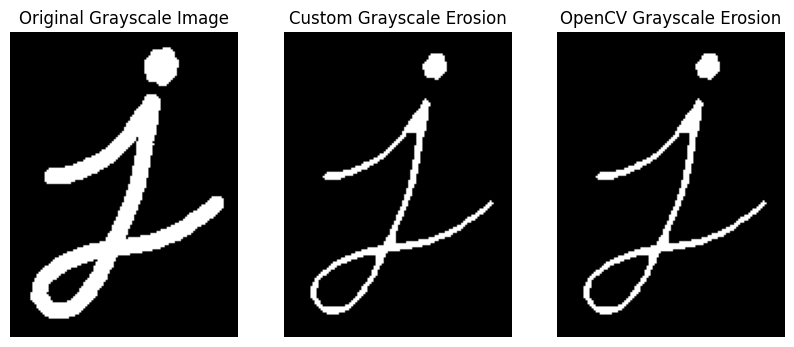

In [15]:
def grayscale_erosion(img, kernel):
    # Get the dimensions of the image and kernel
    img_height, img_width = img.shape[:2]
    kernel_height, kernel_width = kernel.shape[:2]
    
    # Calculate the padding required for the image
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # Create an empty output image
    eroded_img = np.zeros_like(img)
    
    # Pad the image on all sides
    padded_img = np.pad(img, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    
    # Iterate over each pixel in the image
    for i in range(img_height):
        for j in range(img_width):
            # Extract the neighborhood around the current pixel
            neighborhood = padded_img[i:i+kernel_height, j:j+kernel_width]
            # Apply erosion operation by taking the minimum value in the neighborhood
            eroded_img[i, j] = np.min(neighborhood * kernel)
    
    return eroded_img

# Read the original grayscale image
img_gray = cv2.imread('input.png', cv2.IMREAD_GRAYSCALE)

# Define a structuring element (kernel)
kernel = np.ones((5, 5), np.uint8)

# Perform grayscale erosion using the custom function
eroded_img_custom = grayscale_erosion(img_gray, kernel)

# Perform grayscale erosion using OpenCV
eroded_img_opencv = cv2.erode(img_gray, kernel)

# Display the original image and the results of grayscale erosion
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(eroded_img_custom, cmap='gray')
plt.title('Custom Grayscale Erosion')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(eroded_img_opencv, cmap='gray')
plt.title('OpenCV Grayscale Erosion')
plt.axis('off')

plt.show()

# Grayscale Opening

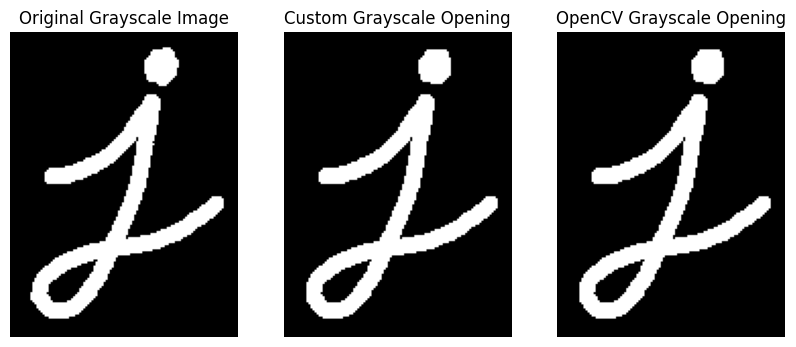

In [16]:
def grayscale_opening(img, kernel):
    # Perform grayscale erosion followed by grayscale dilation
    eroded_img = grayscale_erosion(img, kernel)
    opened_img = grayscale_dilation(eroded_img, kernel)
    return opened_img

# Read the original grayscale image
img_gray = cv2.imread('input.png', cv2.IMREAD_GRAYSCALE)

# Define a structuring element (kernel)
kernel = np.ones((5, 5), np.uint8)

# Perform grayscale opening using the custom function
opened_img_custom = grayscale_opening(img_gray, kernel)

# Perform grayscale opening using OpenCV
opened_img_opencv = cv2.morphologyEx(img_gray, cv2.MORPH_OPEN, kernel)

# Display the original image and the results of grayscale opening
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(opened_img_custom, cmap='gray')
plt.title('Custom Grayscale Opening')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(opened_img_opencv, cmap='gray')
plt.title('OpenCV Grayscale Opening')
plt.axis('off')

plt.show()

# Grayscale Closing

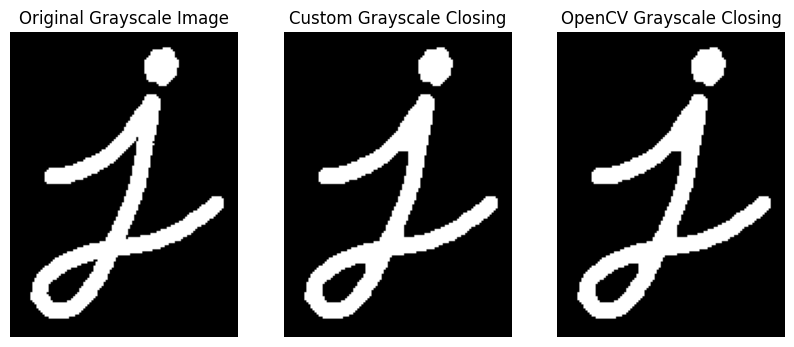

In [17]:
def grayscale_closing(img, kernel):
    # Perform grayscale dilation followed by grayscale erosion
    dilated_img = grayscale_dilation(img, kernel)
    closed_img = grayscale_erosion(dilated_img, kernel)
    return closed_img

# Read the original grayscale image
img_gray = cv2.imread('input.png', cv2.IMREAD_GRAYSCALE)

# Define a structuring element (kernel)
kernel = np.ones((5, 5), np.uint8)

# Perform grayscale closing using the custom function
closed_img_custom = grayscale_closing(img_gray, kernel)

# Perform grayscale closing using OpenCV
closed_img_opencv = cv2.morphologyEx(img_gray, cv2.MORPH_CLOSE, kernel)

# Display the original image and the results of grayscale closing
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(closed_img_custom, cmap='gray')
plt.title('Custom Grayscale Closing')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(closed_img_opencv, cmap='gray')
plt.title('OpenCV Grayscale Closing')
plt.axis('off')

plt.show()

# Grayscale Gradient

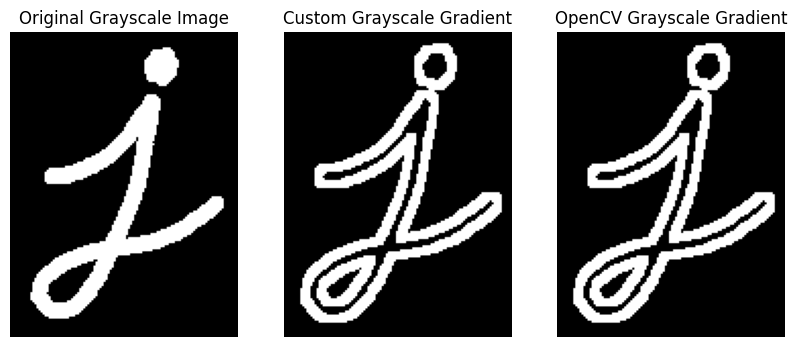

In [18]:
def grayscale_gradient(img, kernel):
    # Perform grayscale dilation
    dilated_img = grayscale_dilation(img, kernel)
    # Perform grayscale erosion
    eroded_img = grayscale_erosion(img, kernel)
    # Compute the gradient by subtracting the eroded image from the dilated image
    gradient_img = dilated_img - eroded_img
    return gradient_img

# Read the original grayscale image
img_gray = cv2.imread('input.png', cv2.IMREAD_GRAYSCALE)

# Define a structuring element (kernel)
kernel = np.ones((5, 5), np.uint8)

# Perform grayscale gradient using the custom function
gradient_img_custom = grayscale_gradient(img_gray, kernel)

# Perform grayscale gradient using OpenCV
gradient_img_opencv = cv2.morphologyEx(img_gray, cv2.MORPH_GRADIENT, kernel)

# Display the original image and the results of grayscale gradient
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gradient_img_custom, cmap='gray')
plt.title('Custom Grayscale Gradient')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gradient_img_opencv, cmap='gray')
plt.title('OpenCV Grayscale Gradient')
plt.axis('off')

plt.show()

# Grayscale Top-hat

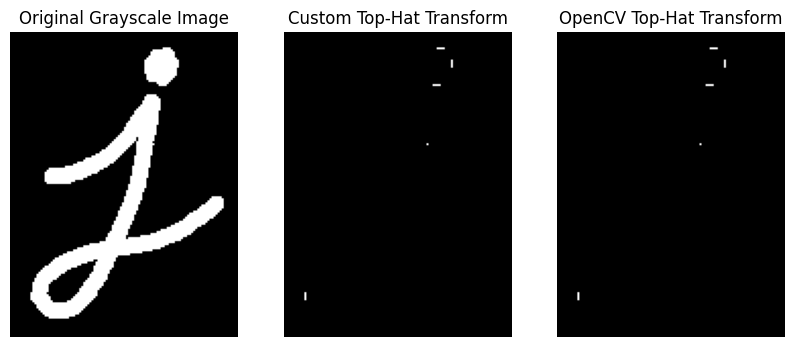

In [19]:
def top_hat_transform(img, kernel):
    # Perform grayscale opening
    opened_img = grayscale_opening(img, kernel)
    # Compute the top-hat transform by subtracting the opened image from the original image
    top_hat_img = img - opened_img
    return top_hat_img

# Read the original grayscale image
img_gray = cv2.imread('input.png', cv2.IMREAD_GRAYSCALE)

# Define a structuring element (kernel)
kernel = np.ones((5, 5), np.uint8)

# Perform top-hat transform using the custom function
top_hat_img_custom = top_hat_transform(img_gray, kernel)

# Perform top-hat transform using OpenCV
top_hat_img_opencv = cv2.morphologyEx(img_gray, cv2.MORPH_TOPHAT, kernel)

# Display the original image and the results of top-hat transform
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(top_hat_img_custom, cmap='gray')
plt.title('Custom Top-Hat Transform')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(top_hat_img_opencv, cmap='gray')
plt.title('OpenCV Top-Hat Transform')
plt.axis('off')

plt.show()

# Grayscale Black-hat

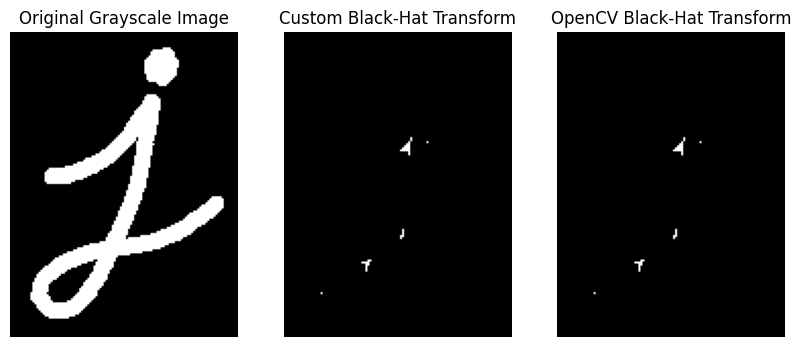

In [20]:
def black_hat_transform(img, kernel):
    # Perform grayscale closing
    closed_img = grayscale_closing(img, kernel)
    # Compute the black-hat transform by subtracting the original image from the closed image
    black_hat_img = closed_img - img
    return black_hat_img

# Read the original grayscale image
img_gray = cv2.imread('input.png', cv2.IMREAD_GRAYSCALE)

# Define a structuring element (kernel)
kernel = np.ones((5, 5), np.uint8)

# Perform black-hat transform using the custom function
black_hat_img_custom = black_hat_transform(img_gray, kernel)

# Perform black-hat transform using OpenCV
black_hat_img_opencv = cv2.morphologyEx(img_gray, cv2.MORPH_BLACKHAT, kernel)

# Display the original image and the results of black-hat transform
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(black_hat_img_custom, cmap='gray')
plt.title('Custom Black-Hat Transform')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(black_hat_img_opencv, cmap='gray')
plt.title('OpenCV Black-Hat Transform')
plt.axis('off')

plt.show()